### О задании
Результат работы − отчет в формате ноутбуков IPython (ipynb-файл). Код пишется на Python3. Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете также должен быть код, однако чем меньше кода, тем лучше всем: мне − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.    
Выполнение лабораторных работ занимает значительное время, поэтому не рекомендуем оставлять их на последний вечер перед сдачей.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) получают за всю лабораторную работу 0 баллов. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо в комментариях к коду указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

**Важно!!!** Прочитайте [руководство по написанию кода](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html). Работы, где будут грубо нарушены принципы оформления кода, будут штрафоваться!    
Также помните, что самая главная ошибка, которую надо избегать, - дублирование кода.

### Правила сдачи
Выполненную работу следует отправить на почту `nikmort@ya.ru` с указанием темы `[FBB hw <номер домашнего задани> Surname Name]`, например `FBB hw 2 Ivanov Petr`. Название отправляемого файла должно иметь следующий формат: `N_Surname_Name.ipynb`, где `N` — номер домашнего задания. Например, `2_Ivanov_Petr.ipynb`.

### Задача
В этой работе вам необходимо будет обучать модели машинного обучения, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week
 
Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

### Метрика качества

Многие модели машинного обучения позволяют не только отнести объект к какому-нибудь из классов, но и выдать вероятность принадлежности $\tilde{y}(x)$ к этому классу. Например, в задаче бинарной классификации по умолчанию мы классифицируем объект первым классом, если вероятность принадлежности 1-ому классу будет больше 50%. Однако, можно перенастроить модель и относить объект к первому классу, если это вероятность будет больше некоторого параметра $\theta$.

$$y(x) = 
\begin{cases}
+1, &\text{если} \; \tilde{y}(x) \geq \theta \\
-1, &\text{если} \; \tilde{y}(x) < \theta
\end{cases}
$$

В таких случаях удобно работать с метрикой ROC-AUC.

Теоретическая задача **(5 баллов)**. Определим понятие доли дефектных пар ответов классификатора. Пусть дан классификатор $a(x)$, который возвращает оценки принадлежности объектов классам: чем больше ответ классификатора, тем более он уверен в том, что данный объект относится к классу $+1$. Отсортируем все объекты по неубыванию ответа классификатора $a$: $x_{(1)}, \dots, x_{(\ell)}$. Обозначим истинные ответы на этих объектах через $y_{(1)}, \dots, y_{(\ell)}$.
Тогда доля дефектных пар записывается как
$$  \text{DP}(a, X^\ell)
    =
    \frac{2}{\ell (\ell - 1)}
    \sum_{i < j}^{\ell}
        \left[
            y_{(i)} > y_{(j)}
        \right].
$$

Как данный функционал связан с площадью под ROC-кривой?
Ответ должен быть дан в виде формулы, связывающей DP и AUC. Ответ должен быть обоснован.

<hr style="height:1px;border:none;" />
**ОТВЕТ**

Обозначим число объектов класса $+1$ за $l_{(+1)}$, а число объектов класса $-1$ за $l_{(-1)}$. 
Тогда 

$$  \text{DP}(a, X^\ell)
    =
    \frac{2l_{(+1)}l_{(-1)}}{\ell (\ell - 1)}
    (1 - AUC).
$$

$\bf {Обоснование.}$

Идем по отсортированным объектам справа налево: если данный объект принадлежит к классу $-1$, то AUC-ROC увеличивается на площадь прямоугольника, высота которого равна произведению количества ранее встреченных объектов класса $+1$ и величине скачка при встрече объекта класса $+1$, а ширина равна скачку при встрече объекта класса $-1$. Значит, когда мы дойдем до объекта, соответствующего минимальному порогу на ROC-кривой, AUC-ROC будет равна сумме таких прямоугольников. Выражение для этого следующее: 
$
\frac{1}{l_{(+1)}l_{(-1)}}
\sum_{i = 1}^{\ell}
    \left[
        y_{(i)} = -1
    \right]
\sum_{j = i + 1}^{\ell}
    \left[
        y_{(j)} = +1
    \right]
$.
Это эквивалентно такой форме записи:
$
\frac{1}{l_{(+1)}l_{(-1)}}
\sum_{i = 1}^{\ell}
    \sum_{j = i + 1}^{\ell}
    \left[
        y_{(i)} < y_{(j)}
    \right]
$.
Что, в свою очередь, эквивалентно данному выражению: $
1 - 
\frac{1}{l_{(+1)}l_{(-1)}}
\sum_{i < j}
    \left[
        y_{(i)} > y_{(j)}
    \right]
$ (поскольку вся площадь равна единице).

Свяжем это с формулой DP и получим ответ, указанный выше:
$$ 
AUC-ROC = 1 - 
\frac{1}{l_{(+1)}l_{(-1)}}
\sum_{i < j}
    \left[
        y_{(i)} > y_{(j)}
    \right]
= 
\frac{l_{(+1)}l_{(-1)}-
    \sum_{i < j}
        \left[
            y_{(i)} > y_{(j)}
        \right]
    }
    {l_{(+1)}l_{(-1)}}
$$

Тогда

$$
1 - AUC-ROC = 
\frac{l_{(+1)}l_{(-1)}
    -l_{(+1)}l_{(-1)}
    +
    \sum_{i < j}
        \left[
            y_{(i)} > y_{(j)}
        \right]
}
    {l_{(+1)}l_{(-1)}}
=
\frac{
    \sum_{i < j}
        \left[
            y_{(i)} > y_{(j)}
        \right]
}
    {l_{(+1)}l_{(-1)}}
$$

Подставим это выражение в формулу DP вместо суммы 
$\sum_{i < j}
    \left[
        y_{(i)} > y_{(j)}
    \right]
$ и домножим на $l_{(+1)}l_{(-1)}$. Получаем итог:

$$  \text{DP}(a, X^\ell)
    =
    \frac{2l_{(+1)}l_{(-1)}}{\ell (\ell - 1)}
    (1 - AUC).
$$
<hr style="height:1px;border:none;" />

### Параметры и гиперпараметры модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры. Параметры настраиваются в ходе обучения алгоритмом обучения (например, структура решающего дерева - рассматриваемые признаки в узлах и пороги), а гиперпараметры задаются заранее (например, максимальная глубина решающего дерева или число соседей в методе ближайших соседей). Как правило, у каждой из модели несколько гиперпараметров и нет универсального набора гиперпараметров: для каждой задачи нужно подбирать свой.

Для поиска наилучших гиперпараметров часто используют перебор по сетке (grid search): для каждого гиперпараметра выбирается несколько значений, перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется).

### Обучение и тестирование

Обучение и тестирование модели проводится на непересекающихся множествах (train и test). Соотношения между размерами этих множеств - компромисс. В случае большой обучающий выборки получается более точный алгортим, но бОльший шум при оценки качества. При снижении объема обучающей выборки, алгоритм становится менее точным, зато получается менее шумная оценка качества.

При решении задачи обучения по прецендентам приходится сравнивать различные модели и для каждой из моделей подбирать гиперпараметры. Для сравнения моделей необходимо измерять их качество. Качество можно либо измерять по описанной выше схеме, разделяя исходную выборку на обучающую и тренировочную, но в этом случае при большом переборе моделей и гиперпараметров произойдет переобучение на тестовую выборку (из-за того, что оценка качества, как правило, сильно зависит от разбиения выборки).

Поэтому при сравнении моделей выборка разбивается разными способами на обучение и тест, а оценка качества вычисляется путем усреднения результатов на каждом из разбиений. Такой способ называется кросс-валидацией; есть различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки

Однако, такая процедура вычислительно затратна, особенно, если нужно перебрать большое число комбинаций гиперпараметров. Поэтому есть несколько способов упростить ее:

- перебирать гиперпараметры с большим шагом; например, число деревьев для случайного леса перебирать в диапозоне `range(10, 100, 10)` вместо `range(10, 100, 1)`;
- уменьшить количество фолдов в кросс-валидации (чревато зашумлением оценки качетсва);
- оптимизировать гиперпараметры последовательно (есть риск пропустить хорошую комбинацию);
- перебрать случайной подмножество из множество комбинаций гиперпараметров.

### Решение

Загрузите набор данных *data.adult.csv* с помощью `pandas`. Чтобы посмотреть данные, можно вызвать для загруженного `DataFrame` метод `head`.

In [1]:
import pandas as pd

df = pd.read_csv('data.adult.csv')

print(df.shape)     #посмотрим, сколько объектов и признаков в нашем датасете
df.head()           #и мельком глянем на него 

(16280, 14)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


**(2 балла)** Для некоторых объектов могут быть пропущены значения некоторых признаков. Пропуски могут обозначаться либо значением `numpy.nan`, либо каким-то определенным значением, которое указывается в описании к набору данных. В данном датасете пропущенные значения обозначены как "?". 

Некоторые алгоритмы могут работать некорректно с пропущенными значениями. Примените к выборке один из методов обработки пропущенных значений. Обоснуйте свой выбор.

In [2]:
def nan_cols(df):                           #посмотрим, где вообще есть пропуски, и посчитаем их 
    for x in df.columns:
        if "?" in df[x].value_counts():
            print(x, df[x].value_counts()['?'], sep=', ')
nan_cols(df)

print(df[(df['workclass'] == '?') & (df['occupation'] == '?')].shape)

'''
видим, что когда пропущено значение в workclass, то пропущено и в 
occupation, а еще у 4х объектов пропуск только в occupation
выкинем объекты с пропусками из выборки
'''

df.drop(df[df['occupation']=='?'].index, inplace=True)
df.index = list(range(len(df)))
print(df.shape)

workclass, 929
occupation, 933
(929, 14)
(15347, 14)


<hr style="height:1px;border:none;" />

**Обоснование**

Объектов с пропусками достаточно мало, поэтому избавление от них вряд ли сильно повлияет на обучение классификаторов. 
<hr style="height:1px;border:none;" />

Далее проделайте следующее:
 - Перемешайте объекты, чтобы исключить возможные последствия изначальной сортировки данных.
 - Выделите метки классов в отдельный вектор, удалите их из матрицы "объект-признак" и преобразуйте метки классов к бинарному формату (+1, -1).
 - Оставьте в датасете только вещественные признаки; сначала мы будем работать только с ними.
 
Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

In [3]:
from sklearn.utils import shuffle


def get_conts():                   #найдем вещественные признаки, чтобы оставить только их
    conts = []
    for x in df.columns:
        if 'int' == df[x].dtype or 'float' == df[x].dtype:
            conts.append(x)
    return conts    


df = shuffle(df, random_state=38)   

d = {'<=50K' : -1, '>50K' : 1}
df['>50K,<=50K'] = df['>50K,<=50K'].map(d)
y = df['>50K,<=50K']
df.drop('>50K,<=50K', axis=1, inplace=True)      

df = df[get_conts()]
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
9241,27,86681,13,0,0,40
1473,53,153486,6,0,0,40
2077,39,432555,9,0,1628,40
2690,42,165916,13,0,0,45
12337,34,386370,10,0,0,50


### Обучение классификаторов на вещественных признаках

В начале посмотрим, как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 3 алгоритма:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Для начала оптимизируем один гиперпараметр у каждой из первых двух моделей:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 
Остальные параметры пусть принимают значения по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV: [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

In [65]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_auc_score
import numpy as np

In [66]:
kf = KFold(n_splits=5, shuffle=True, random_state=38)

params_knn = {'n_neighbors': np.arange(1, 70)}
grid_knn = gscv(knn(), params_knn, cv=kf, n_jobs=4, scoring='roc_auc')
grid_knn.fit(df, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=38, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'n_neighbors': array([ 1,  2, ..., 68, 69])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [59]:
params_dt = {'max_depth': np.arange(1, 50)}
grid_dt = gscv(dtc(random_state=38), params_dt, cv=kf, n_jobs=4, scoring='roc_auc')
grid_dt.fit(df, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=38, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=38, splitter='best'),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

**(6 баллов)** Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал (значение качества на каждом фолде, среднее значение качества и много другой полезной информации можно получить из поля [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)). Построение графика стоит выделить в отдельную функцию - это избавит вас от дублирования кода при выполнении дальнейшего задания.



Что вы можете сказать о получившихся графиках?

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

#эта функция - позаимствованный и адаптированный кусок plot_quality_intervals 
#из classifier_training.ipynb с третьго семинара
def get_plot(scores, stds, values, name):
    plt.figure(figsize=(18, 8))
    plt.plot(values, scores)
    plt.fill_between(values, scores + stds, scores - stds, alpha = 0.2, facecolor='blue')
    plt.xlim(1, max(values))
    plt.ylim(np.min(scores - stds) - 0.1, 1)
    plt.xticks(np.arange(1, max(values), max(values)//10))
    plt.xlabel(name)
    plt.ylabel('ROC-AUC')

The best k for kNN:  3
The best depth for Decision Tree:  7


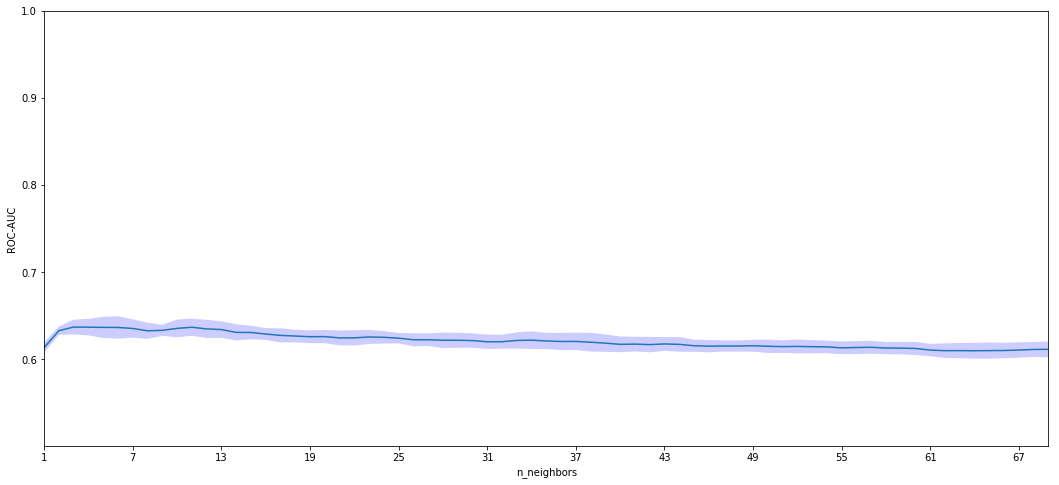

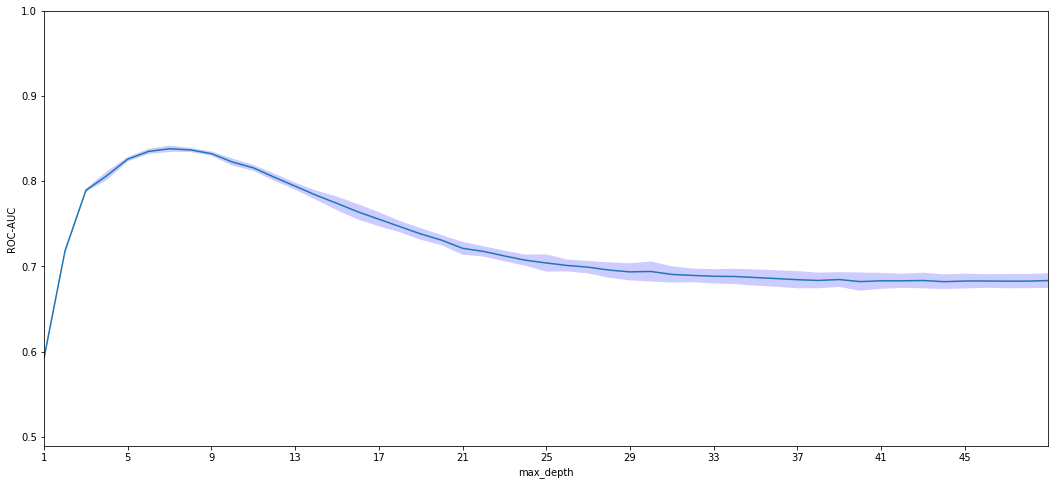

In [68]:
def get_ssv(grid, param_name):                  #функция получает аргументы для get_plot из gridsearcher'ов
    mean_scores = grid.cv_results_['mean_test_score']
    mean_stds = grid.cv_results_['std_test_score']
    param_values = [grid.cv_results_['params'][i][param_name] for i in range(len(grid.cv_results_['params']))]
    return get_plot(mean_scores, mean_stds, param_values, param_name)
    
    
print('The best k for kNN: ', grid_knn.best_params_['n_neighbors'])
print('The best depth for Decision Tree: ', grid_dt.best_params_['max_depth'])
get_ssv(grid_knn, 'n_neighbors')
get_ssv(grid_dt, 'max_depth')

<hr style="height:1px;border:none" />

$\bf {Рассужения}$


**График 1:**

На первом графике, изображающем качество классификации объектов алгоритмом k ближайших соседей при различном количестве соседей, видно, что сначала качество модели растет с увеличением числа соседей, затем выходит на небольшое плато, после чего начинает просаживаться. И это неудивительно, ведь при небольшом числе соседей малейший шум в данных сильно влияет на классификацию: рядом с классифицируемым объектом может случайно оказаться небольшое число объектов другого класса из тренировочной выборки. При большем числе соседей это перестаёт иметь влияние. Одноко мы видим постепенную просадку в качестве с увеличением числа соседей. Возможно, потому что посреди одного класса есть "островки" из объектов другого класса, и при большом количестве соседей эти островки будет поглощёны чужим классом.

**График 2:**

На нём изображена зависимость качества классификации объектов решающим деревом от глубины дерева. При небольшой глубине дерева качество низкое, т.к. решение выносится по очень маленькому числу условий "если... - то...". Например, при высоте дерева, равной 1, решение выносится с учетом значения лишь одного признака. При увеличении высоты дерева качество растет и достигает своего максимума при глубине 7, а после этого начинает падать, т.к. дерево переобучается, "запоминая" объекты. 
<hr style="height:1px;border:none;" />

**(3 балла)** Также подберём число деревьев (*n_estimators*) в алгоритме RandomForest. В общем случае Random Forest не переобучается с увеличением количества деревьев. Подберите значение гиперпараметра, на которой ощутимый прирост качества перестает наблюдаться. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества деревьев разных размеров, состоящих из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте подобранное количество деревьев.

The best number of trees in the Random Forest:  197


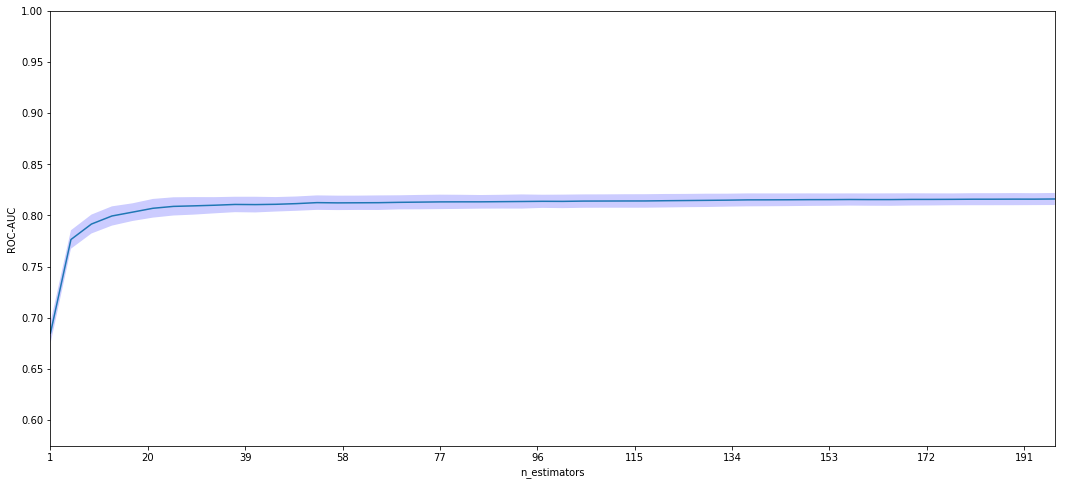

In [62]:
params_rf = {'n_estimators': np.arange(1, 200, 4)}
grid_rf = gscv(rfc(random_state=38), params_rf, cv=kf, n_jobs=4, scoring='roc_auc')
grid_rf.fit(df, y)

print('The best number of trees in the Random Forest: ', grid_rf.best_params_['n_estimators'])
get_ssv(grid_rf, 'n_estimators')

<hr style="height:1px;border:none" />
**Рассуждения**

На графике видно, что в целом качество случайного леса несильно, но уступает качеству одного дерева с оптимальной глубиной. Думаю, проблема в том, что по дефолту дерево в случайном лесе строится до максимальной глубины, что сильно ухудшает качество предсказания на отложенных данных, а в случае решающего дерева мы как раз подбирали глубину. Максимально высокое качество в данном случае наблюдается при количестве деревьев, равном 197.
Виден выход на плато после количества деревьев, примерно равном 20. 
<hr style="height:1px;border:none" />

**(2 балла)** Качество алгоритмов может зависеть не только от значений гиперпараметров, но и от предобратки исходных признаков. Некоторые из рассматриваемых нами алгоритмов чувствительны к масштабу признаков. Посмотрим, насколько различны распределения признаков. Постройте гистограммы для признаков *age*, *fnlwgt*, *capital-gain*.

Глядя на получившиеся графики, скажите в чем заключается особенность данных? На какие алгоритмы это может повлиять? Почему?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f793bda0780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f793bd7c9e8>]], dtype=object)

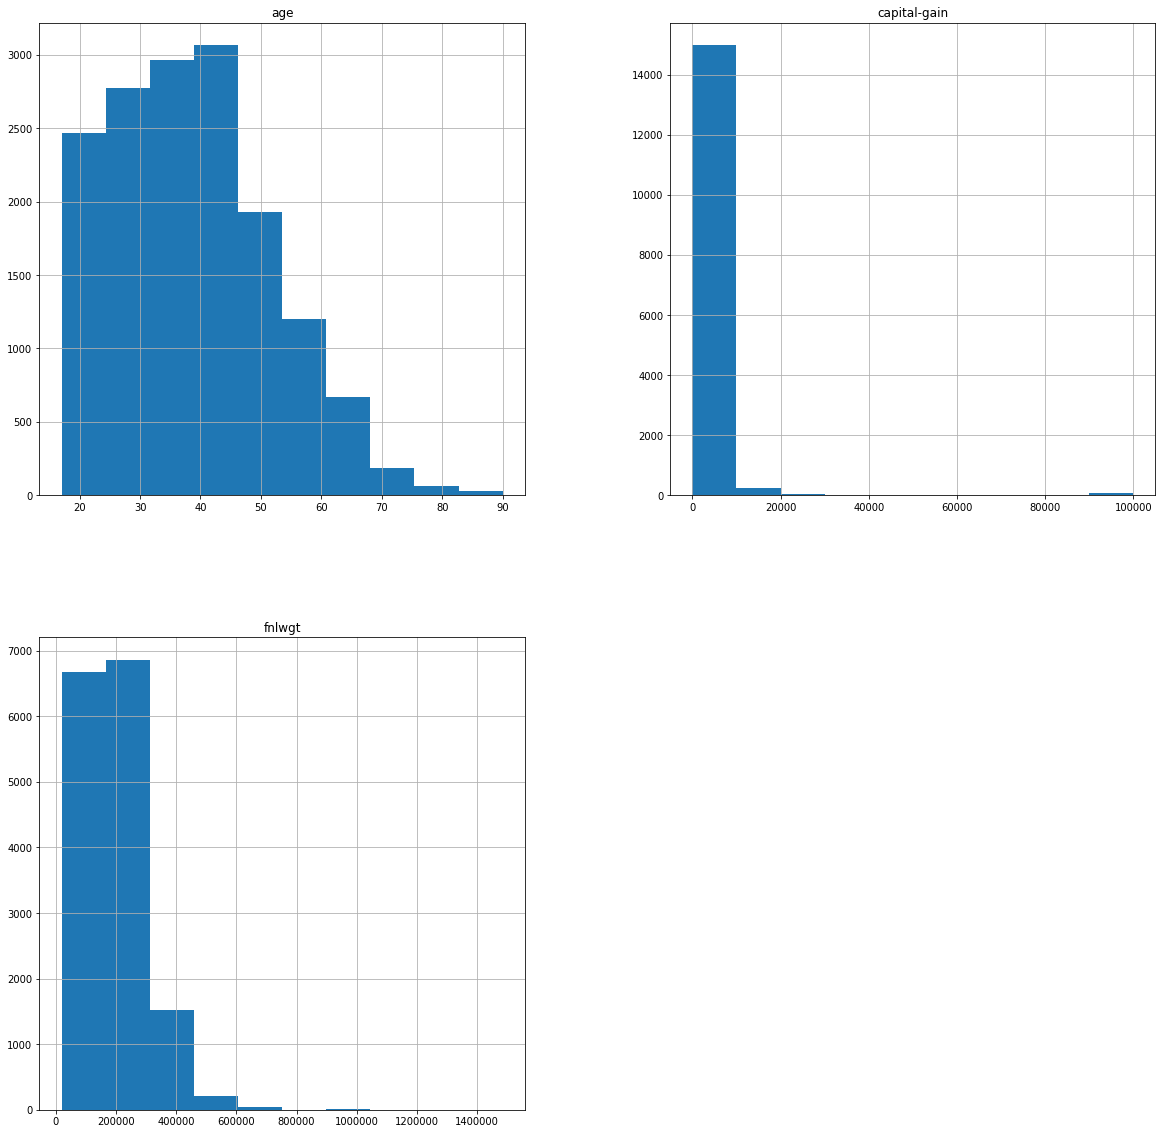

In [75]:
df[['age', 'fnlwgt', 'capital-gain']].hist(figsize=(20,20))

<hr style="height:1px;border:none" />
**Рассуждения о данных**

Видно, что эти признаки имеют очень разный масштаб, что будет влиять на работу метрических классификаторов, потому что там считается расстояние между объектами. На работу логических это не повлияет, поскольку при разбиении выборки в каждом узле дерева используется порог для данного признака. 
<hr style="height:1px;border:none" />

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 
**(2 балла)** Масштабируйте все вещественные признаки одним из указанных способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

Изменилось ли качество у некоторых алгоритмов и почему?

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=False)
scaled_df = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
scaled_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
9241,0.136986,0.045980,0.800000,0.0,0.000000,0.397959
1473,0.493151,0.091568,0.333333,0.0,0.000000,0.397959
2077,0.301370,0.282006,0.533333,0.0,0.417436,0.397959
2690,0.342466,0.100050,0.800000,0.0,0.000000,0.448980
12337,0.232877,0.250489,0.600000,0.0,0.000000,0.500000


The best k for kNN:  51


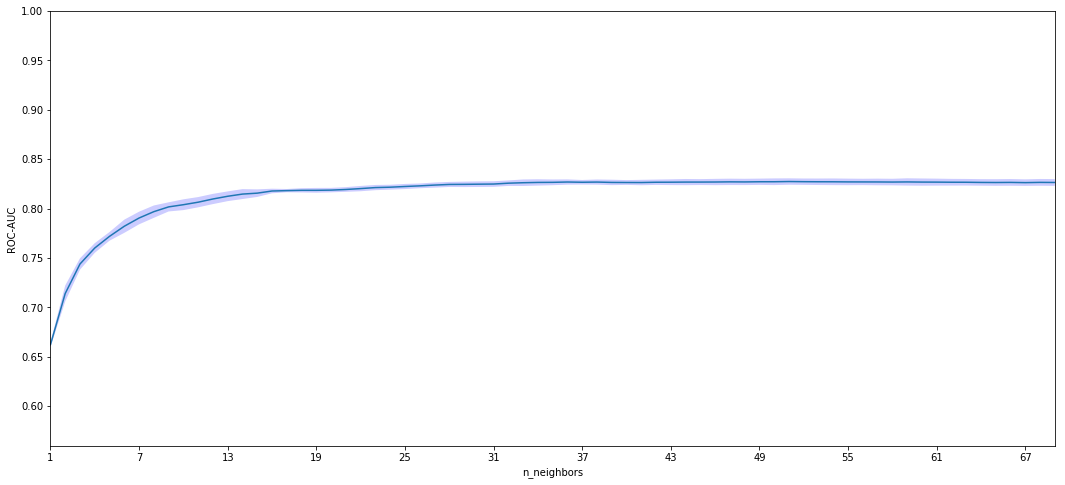

In [69]:
grid_knn.fit(scaled_df, y)
print('The best k for kNN: ', grid_knn.best_params_['n_neighbors'])
get_ssv(grid_knn, 'n_neighbors')

The best depth for Decision Tree:  7


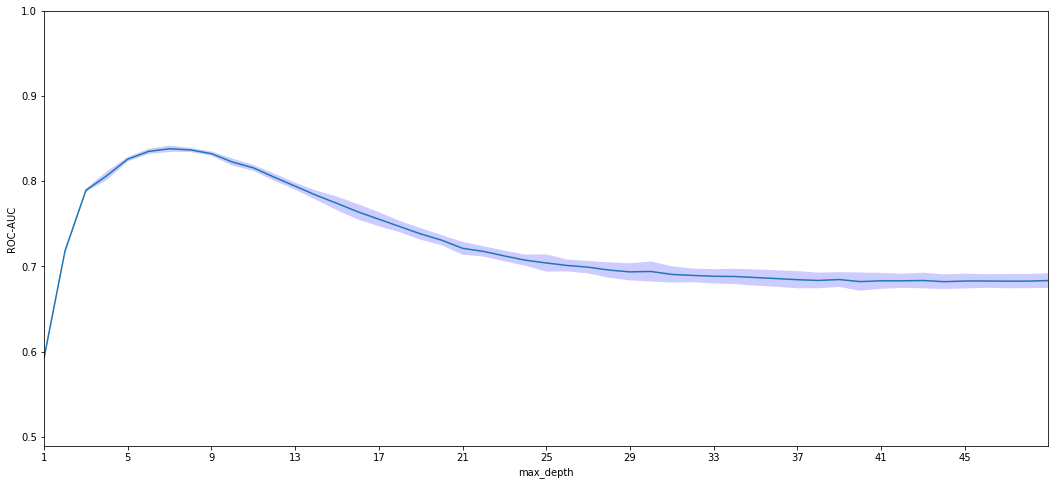

In [70]:
grid_dt.fit(scaled_df, y)
print('The best depth for Decision Tree: ', grid_dt.best_params_['max_depth'])
get_ssv(grid_dt, 'max_depth')

The best number of trees in the Random Forest:  197


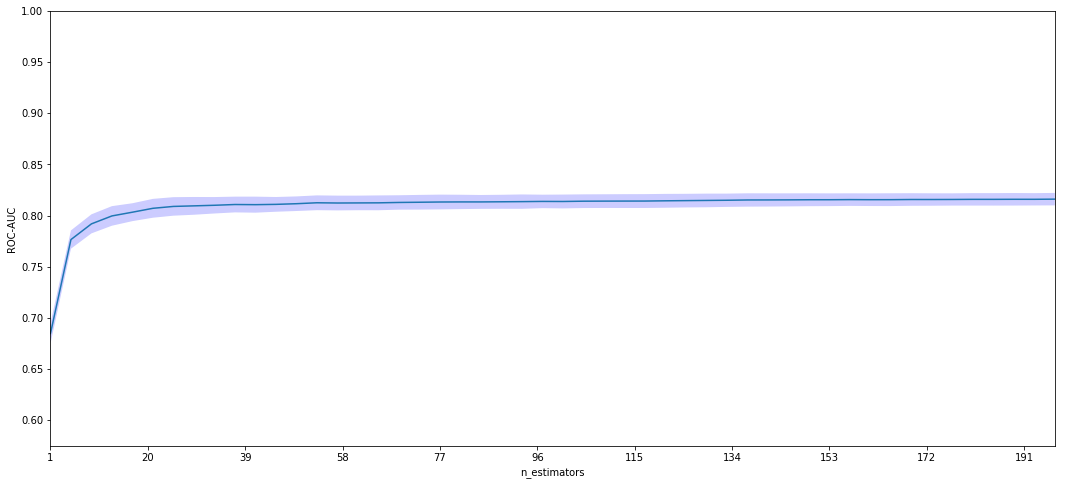

In [71]:
grid_rf.fit(scaled_df, y)
print('The best number of trees in the Random Forest: ', grid_rf.best_params_['n_estimators'])
get_ssv(grid_rf, 'n_estimators')

<hr style="height:1px;border:none" />
**Рассуждения**

Как и предполагалось, шкалирование признаков не повлияло на работу логических классификаторов, но улучшило работу метрического. У алгоритма kNN изменилось как качество работы, так и оптимальное значение гиперпараметра, которое теперь равняется 51 соседу. При этом качество постепенно расло с увеличением числа соседей, а затем вышло на плато. 

<hr style="height:1px;border:none" />

**(8 баллов)** Теперь сделайте перебор гиперпараметров по сетке и найдите оптимальные комбинации для следующих моделей и гиперпараметров: 
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 
Обратите внимание, что эта операция может быть ресурсо- и трудоемкой.

Какой из алгоритмов имеет наилучшее качество?

(для оптимизации кода и вычислений перед выполнением прочитайте следующее задание)

In [73]:
params_knn = {'n_neighbors': range(1,70), 
            'metric': ["euclidean", "manhattan", "chebyshev", "minkowski"]}

grid_knn = gscv(knn(), params_knn, cv=kf, n_jobs=4, scoring='roc_auc')
grid_knn.fit(scaled_df, y)

print('The best hyperparameters for kNN are: ', grid_knn.best_params_, '.', 
      'ROC-AUC: ', grid_knn.best_score_, sep='')

The best hyperparameters for kNN are: {'n_neighbors': 57, 'metric': 'manhattan'}.ROC-AUC: 0.8288193595


In [74]:
params_dt = {'max_depth': range(1, 31),
           'criterion': ["gini", "entropy"]}


grid_dt = gscv(dtc(random_state=38), params_dt, cv=kf, n_jobs=4, scoring='roc_auc')
grid_dt.fit(scaled_df, y)

print('The best hyperparameters for Decision Tree are: ', grid_dt.best_params_, '.',
      ' ROC-AUC: ', grid_dt.best_score_, sep='')

The best hyperparameters for Decision Tree are: {'max_depth': 8, 'criterion': 'entropy'}. ROC-AUC: 0.839597214321


In [75]:
params_rf = {'criterion': ["gini", "entropy"],
            'max_features': ['auto', 'log2', None, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]}

grid_rf = gscv(rfc(n_estimators=197, random_state=38), params_rf, cv=kf, n_jobs=4, scoring='roc_auc')
grid_rf.fit(scaled_df, y)

print('The best hyperparameters for Random Forest are: ', grid_rf.best_params_, '.', 
      ' ROC-AUC: ', grid_rf.best_score_, sep='')

The best hyperparameters for Random Forest are: {'max_features': None, 'criterion': 'entropy'}. ROC-AUC: 0.818014424266


<hr style="height:1px;border:none" />
**Рассуждения**

Лучшее качество получилось у решающего дерева. Случайный лес показал сравнительно плохой результат, поскольку в нем не подбиралась высота дерева, и в итоге лес получился ансамблем оверфитнутых моделей. 
<hr style="height:1px;border:none" />

**(3 балла)** Сравните алгоритмы с точки зрения времени обучения. Обучение какого из алгоритмов работает дольше всего и почему?

(hint: [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) подсчитывает не только качество на кросс-валидации, но и время работы алгоритмов)

In [76]:
print('Mean fit time for kNN is: ', np.mean(grid_knn.cv_results_['mean_fit_time']),'s', sep='')
print('Mean fit time for Decision Tree is: ', np.mean(grid_dt.cv_results_['mean_fit_time']),'s', sep='')
print('Mean fit time for Random Forest is: ', np.mean(grid_rf.cv_results_['mean_fit_time']),'s', sep='')

Mean fit time for kNN is: 0.0368227436923s
Mean fit time for Decision Tree is: 0.0433673469226s
Mean fit time for Random Forest is: 5.43454284403s


<hr style="height:1px;border:none" />
**Рассуждения**

Дольше всего длится обучение случайного леса, ибо оно состоит в обучении определенного числа (в нашем случае - 197) решающих деревьев. Несмотря на то, что эта задача эффективно параллелится на процессорных ядрах, при большом количестве деревьев процедура все равно сравнительно длительная. 
<hr style="height:1px;border:none" />

### Добавление категориальных признаков в модели

Вспомним, что у нас еще есть категориальные признаки. Давайте посмотрим, как изменится качество модели после добавления этих признаков. 

**(1 балл)** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn).

In [77]:
df_mf = pd.read_csv('data.adult.csv')
df_mf.drop(df_mf[df_mf['occupation']=='?'].index, inplace=True)
df_mf.drop('>50K,<=50K', axis=1, inplace=True)      
df_mf.index = list(range(len(df_mf)))
df_mf = pd.get_dummies(df_mf)
df_mf = pd.DataFrame(scaler.fit_transform(df_mf), index=df_mf.index, columns=df_mf.columns)
df_mf.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0.232877,0.181207,0.533333,0.005940,0.0,0.602041,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.315068,0.116683,0.600000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.260274,0.108200,0.800000,0.000000,0.0,0.397959,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.068493,0.112907,0.600000,0.000000,0.0,0.295918,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.410959,0.088984,0.800000,0.150242,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Так как после кодирования признаков получилось достаточно много, в этой работе мы не будем добавлять их и подбирать заново оптимальные гиперпараметры (хотя правильнее было бы это сделать). 

**(3 балла)** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами из предыдущего пункта. Дало ли добавление новых признаков прирост качества? Измеряйте качество как и раньше используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

In [80]:
model_knn = knn(n_neighbors= 57, metric= 'manhattan', n_jobs=4)
model_dt = dtc(max_depth=8, criterion='entropy', random_state=38)
model_rf = rfc(n_estimators=197, criterion='entropy', max_features=None, n_jobs=4, random_state=38)

print('ROC-AUC score of kNN is', np.mean(cross_val_score(model_knn, df_mf, y, cv=kf)))
print('ROC-AUC score of Decision Tree is', np.mean(cross_val_score(model_dt, df_mf, y, cv=kf, scoring='roc_auc')))
print('ROC-AUC score of Random Forest is', np.mean(cross_val_score(model_rf, df_mf, y, cv=kf, scoring='roc_auc')))

ROC-AUC score of kNN is 0.743207614657
ROC-AUC score of Decision Tree is 0.500737002624
ROC-AUC score of Random Forest is 0.497932164806


<hr style="height:1px;border:none" />
**Рассуждения**

Качество всех моделей ухудшилось, чудовищно провалилось качество дерева и леса. Видимо, признаков стало слишком много. Теперь лучшей моделью является kNN. Он показал более или менее достойный результат, т.к. one-hot encoding генерирует признаки со значениями 0 или 1, которые не выбиваются из общего масштаба признаков. 
<hr style="height:1px;border:none" />

### Сравнение построенных моделей

**(4 балла)** После того как было построено много моделей хотелось бы сравнить их между собой. Воспользуйтесь "ящиком с усами" (boxplot) для сравнения алгоритмов между собой. 

Для каждого типа классификатора (kNN, DecisionTree, RandomForest) выберете тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха (все классификаторы должны быть изображены на одном графике).
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

In [81]:
kf15 = KFold(n_splits=15, shuffle=True, random_state=38)

knn_scores = cross_val_score(model_knn, scaled_df, y, cv=kf15, scoring='roc_auc')
dt_scores = cross_val_score(model_dt, scaled_df, y, cv=kf15, scoring='roc_auc')
rfm_scores = cross_val_score(model_rf, scaled_df, y, cv=kf15, scoring='roc_auc')

In [82]:
params_rf = {'max_depth': np.arange(2,20)}

grid_rf = gscv(model_rf, params_rf, cv=kf, n_jobs=4, scoring='roc_auc')
grid_rf.fit(scaled_df, y)

print('The best hyperparameters for Random Forest are: ', grid_rf.best_params_, '.', 
      ' ROC-AUC: ', grid_rf.best_score_, sep='')

The best hyperparameters for Random Forest are: {'max_depth': 8}. ROC-AUC: 0.853442658185


In [83]:
'''
я решил также добавить случайный лес, в котором высота дерева равна оптимальной (подобранной выше), 
чтобы показать разницу между ансамблем хороших моделей и ансамблем оверфитнутых 
'''

rf6_scores = cross_val_score(rfc(n_estimators=197, max_depth=8, criterion='entropy', max_features=None, n_jobs=4, 
                                 random_state=38), 
                             scaled_df, y, cv=kf15, scoring='roc_auc')

In [84]:
from plotly.offline import init_notebook_mode, iplot    #здесь я решил использовать plotly, т.к. в нем
import plotly.graph_objs as go                          #box-plot'ы делаются достаточно просто, а для итоговой
                                                        #картинки всей работы интерактивный график
                                                        #будет своеобразной изюминкой (plotly научился благодаря 
                                                        #курсу ODS - https://habrahabr.ru/company/ods/blog/323210/)
init_notebook_mode(connected=True)
scr = pd.DataFrame()
scr['kNN'] = knn_scores
scr['Decision Tree'] = dt_scores
scr['Random Forest (of)'] = rfm_scores
scr['Random Forest (tuned depth)'] = rf6_scores

In [85]:
data_to_vis = []
for column in scr.columns:
    data_to_vis.append(
        go.Box(y=scr[column], name=column)
    )

iplot(data_to_vis, show_link = False)

<hr style="height:1px;border:none" />
**Итоговые рассуждения**

kNN: это метрический классификатор, для хорошей работы которого нужно проводить шкалирование данных. Он не умеет из коробки работать с категориальными признаками - их нужно one-hot-encod'ить, но при этом есть риск получить слишком много признаков и понизить качество классификации. У этого классификатора есть определенные гиперпараметры: количество соседей, по которым выносится решение, используемая для подсчета расстояния между объектами метрика, вес объектов. От этих гиперпараметров зависит качество работы алгоритма. Так, при маленьком числе соседей будет заметно сильное влияние шума в данных, а при слишком большом качество будет падать, если в одном классе есть группа объектов из другого класса. 
Внутри sklearn'а у метода k-ближайших соседей есть другие гиперпараметры, которые уже связаны с его компьютерной реализацией: алгоритм реализации (с помощью KD-дерева, BallTree и пр.), количество используемых процессорных ядер и пр. От этой группы гиперпараметров зависит объем затрачиваемой памяти и процессорное время выполнения алгоритма, но никак не зависит качество классификации.  
Модель является очень простой и интуитивной: посмотрим на самые близкие известные преценденты и вынесем такое же решение. По сути, тут не происходит обучения модели, а есть лишь инференс, сложность которого в самом простом случае - O(knd), где k - число соседей, n - число объектов обучающей выборки, d - размерность пространства (число признаков).

Решающее дерево: логический классификатор, решение которого выносится на иерархической последовательности вопросов вида "если... то...". Относительно хорошо работает с категориальными данными, не зависит от масштаба признаков, т.к. при поиске разбиения в данном узле используется лишь один признак, для которого ищется порог по определенному критерию. Имеет следующие гиперпараметры: критерий качества разбиения, максимальное количество признаков, рассматриваемых в качестве кандидатов для данного разбиения, максимальная глубина дерева, минимальное количество объектов в листе, и пр. Для дерева наиболее критичным гиперпараметром является его глубина, т.к. деревья склонны к сильному переобучению при слишком большой глубине: они просто "запоминают" объекты обучающей выборки. Также при реализации обучающего дерева важно фиксировать сид генератора псевдослучайных чисел для воспроизводимости результатов. 
Эта модель является чуть более сложной, чем kNN, но также интуитивна: из имеющегося опыта (размеченные обучающие данных) найдем перечень критериев, по которому выносится решение. 

Случайный лес: ансамбль решающих деревьев по типу бэггинг (bootstrap aggregating). По случайным подвыборкам и подпространствам признаков независимо обучаются решающие деревья, а решение выносится путем их голосования. У этой модели много гиперпараметров. Во-первых, это все гиперпараметры, применимые к единичному решающему дереву, а также количество деревьев в лесу. Помимо этого, в sklearn'e у случайного леса есть oob_score - это возможность оценивать качество деревьев по объектам, не попавшим в данную подвыборку. Это позволяет иметь меньше объектов в обучающей выборке и облегчает кросс-валидацию, а также позволяет определять информативность признаков: для данного дерева определяем качество на out-of-bag подвыборке, после чего делаем определенный признак полностью неинформативным (перемешивая его значения) и снова определяем качество на oob. Разница между этими двумя качествами, усредненная по всем деревьям, отражает важность признака для модели. 
Случайный лес хорошо параллелится на процессорных ядрах, т.к. каждое дерево можно обучать на своем ядре. 
Данная модель является самой сложной из всех представленных в этом лабораторном занятии, однако также является хорошо интерпретируемой: объект из выборки "сообщает" некие поднаборы своих признаков комитету экспертов, каждый из которых является решающим деревом. Те, в свою очередь, по некоторому набору критериев выносят решение и голосуют за итоговый вердикт. Для бэггинга важно, чтобы каждая индивидуальная модель была достаточно сильной, и при этом модели должны быть как можно более различны. Так что для случайного леса нужно подбирать как число деревьев, так и гиперапаметры для единичного дерева внутри леса.  
На боксплоте выше видно, как отличается качество леса, в котором деревья переобучены (Random Forest (of)), от качества леса с потюненой глубиной дерева (Random Forest (tuned depth)). 
<hr style="height:1px;border:none" />